In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import math
%matplotlib inline
import scipy.stats as stats

# Lecture 21 Assignment

1. For each of the Poisson random variables considered above ( 𝛼=20 , 0.5, and 2), draw 10,000 random variables and plot the cumulative histogram versus the distribution function.


2. In 2003, there were many media reports about the number of shark attacks in Florida. At the end of the year, there were a total of 30 unprovoked shark attacks. By comparison, there were 246 shark attacks over the prior ten years. Using the pre-2003 data, simulate the number of shark attacks for 2003. Based on your simulation, what is the probability that there would be 30 or more shark attacks in that year?


3. Find the analytical answer to question 2. (Evaluate your answer in the Jupyter notebook. Use of scipy.stats to find the answer is encouraged.)

## 1.

In [2]:
def poisson_sim(alpha, num_bins, upper_range, num_sims=10000000):
    P=stats.poisson(alpha)
    p = P.rvs(num_sims)
    
    mybins=range(0,num_bins)
    plt.hist(p,bins=mybins,density=True,alpha=0.3,cumulative=True)
    
    x=np.linspace(-1,upper_range,10000) 
    plt.step(x,P.cdf(x)) # Show that replacing with plt.step is better

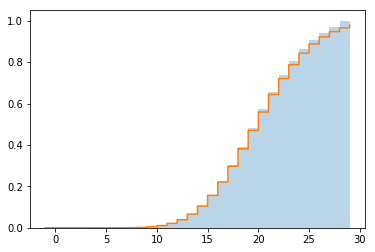

In [3]:
poisson_sim(alpha = 20, num_bins = 30, upper_range = 29)

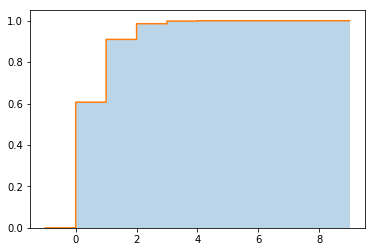

In [4]:
poisson_sim(alpha = 0.5, upper_range = 9, num_bins = 10)

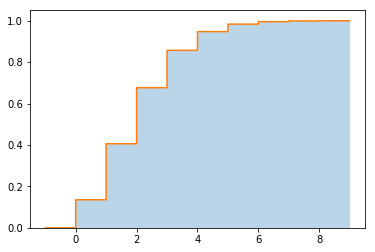

In [5]:
poisson_sim(alpha = 2, upper_range = 9, num_bins = 10)

## 2.

In [6]:
lam = 246/10
t = 1
alpha = lam*t
shark_attack = stats.poisson(alpha)
# simulate 1 million years
num_sims = 1000000
sim_prob_over_29 = sum(shark_attack.rvs(num_sims) >= 30)/num_sims
print("The simulation determined probability that the number of unprovoked shark attacks in Florida over a year is 30 or greater is equal to ~",sim_prob_over_29,".",sep="")

The simulation determined probability that the number of unprovoked shark attacks in Florida over a year is 30 or greater is equal to ~0.16119.


## 3.

In [7]:
analy_prob_over_29 = 1-shark_attack.cdf(29)
print("The analytically determined probability that the number of unprovoked shark attacks in Florida over a year is 30 or greater is equal to ~",int(analy_prob_over_29*10**6)/10**6,".",sep="")

The analytically determined probability that the number of unprovoked shark attacks in Florida over a year is 30 or greater is equal to ~0.161014.


## Conclusion

The shark attacks that occured in 2003 were statistically insignificant; the media hype was unwarranted and led to hysteria over what was likely nothing.